# Evaluation propagation velocity with NRV
---

## Context

The presence of the myelin sheath on large axonal fibers transforms the so-called *continuous* conduction of unmyelinated fibers into a *saltatory* conduction, largely increasing the speed of action potential propagations. In this tutorial, we will simulated several myelinated and unmyelinated fiber model using NRV and investigate how it effects the action potential propagation speed.

First the nrv package is imported as well as the matplotlib package used for plotting nrv's simulation outputs.

In [1]:
import nrv
import matplotlib.pyplot as plt
import numpy as np

## Intracellular stimulation of an unmyelinated axon

Unmyelinated fiber (y,z) coordinates, diameter, length, and computationnal model are defined at the creation of an ```unmyelinated``` object. The default computationnal model uses the ```Rattay_Aberham``` model (Rattay and Aberham, 1993). Others available models are the ```HH``` model (Hodgkin and Huxley, 1952), the ```Sundt``` model (Sundt et al. 2015), the ```Tigerholm``` model (Tigerholm et al. 2014), the ```Schild_94``` model (Schild et al. 1994) and the ```Schild_97``` model (Schild et al. 1997). 

In [2]:
## Axon def
y = 0  # axon y position, in [µm]
z = 0  # axon z position, in [µm]
d = 1  # axon diameter position, in [µm]
L = 5000  # axon length along x, in [µm]
model = "HH"  # Rattay_Aberham if not precised
axon_u = nrv.unmyelinated(y, z, d, L, model=model)

The axon is stimulated by an intracellular current stimulus via the ```insert_I_Clamp``` method of the ```unmyelinated``` class. The stimulus is parameterized with its duration and amplitude, and its position along the fiber's x axis. The stimulus start time is also defined. 

In [3]:
## intracellular current pulse (ICP)
t_start = 1  # ICP time during the sim, in [ms]
duration = 0.1  # ICP duration, in [ms]
amplitude = 5  # ICP amplitude, in [nA]
x_start = 0  # ICP initial postition along the axon, in [µs]
axon_u.insert_I_Clamp(x_start, t_start, duration, amplitude)

Last, the unmeylinated fiber membrane's voltage is solved during ```t_sim``` ms using the ```simulate``` method of the ```unmyelinated``` class. the ```axon_u``` object is a callable object which will automatically called the ```simulate``` method of the ```unmyelinated``` class when called. Results are stored in the ```results``` variable over in the form of a dictionnary.

In [4]:
## Simulation
t_sim = 20  # sim duration, in [ms]
## results = axon_u.simulate(t_sim=t_sim)
results = axon_u(t_sim=t_sim)

Each key of the ```results``` dictionnary are also a member of the ```results``` object.

In [5]:
vmem = results["V_mem"] 
vmem = results.V_mem #equivalent

## Simulation results plots
Now we can use matplotlib to easily visualize some simulation results contained in the ```results``` dictionnary. 


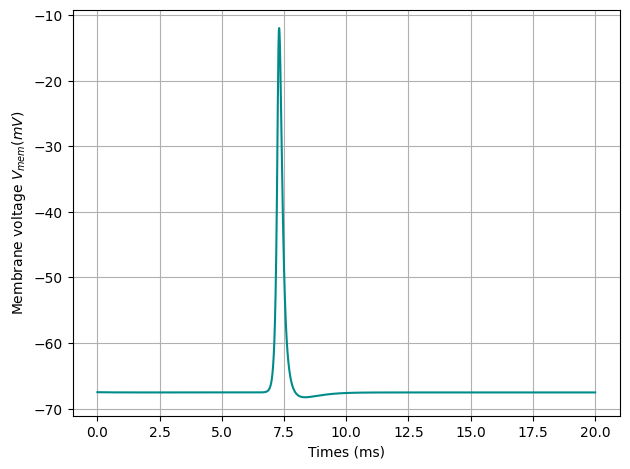

In [6]:
x_idx_mid = len(results["V_mem"]) // 2 #get the mid-fiber x-index position
plt.figure()
plt.plot(results["t"], results["V_mem"][x_idx_mid], color="darkcyan")
plt.xlabel('Times (ms)')
plt.ylabel('Membrane voltage $V_{mem} (mV)$')
plt.grid()
plt.tight_layout()

The plot above shows a momentary voltage increase (a voltage spike) across $V_{mem}$.

The simulated fiber's membrane voltage $V_{mem}$ is a 3-D variable: voltage is solved across the fiber's x-axis (```x_rec``` in ```results```) and across time. The 3-D result can be visualized with a color map. This can simply be obtained with the ``colormap_plot`` method of the ``results`` object: 

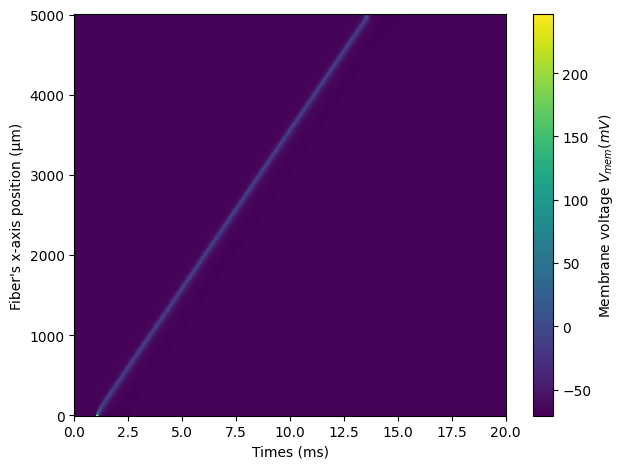

In [7]:

fig, ax = plt.subplots(1)
cbar = results.colormap_plot(ax, "V_mem")
ax.set_xlabel('Time (ms)')
ax.set_ylabel('x-position (µm)')
cbar.set_label(r'Membrane Voltage $V_{mem}$ (mV)')
fig.tight_layout()

We can also use the ``plot_x_t`` method of ``results`` to plot $V_{mem}$ across time and space. The function plot the evolution of $V_{mem}$ across time for a subset of x position (20 by default): 

In [ ]:
fig, ax = plt.subplots(1)
results.plot_x_t(ax,'V_mem')
ax.set_ylabel("Axon x-axis (µm)")
ax.set_xlabel("Time (ms)")
ax.set_xlim(0,results.tstop)
ax.set_ylim(0,np.max(results.x_rec))

The color plot shows that the voltage spike across the fiber's voltage propagates from one end of the fiber ($x = 0\mu m$, where the current clamp is attached to the fiber) to the other end of the fiber ($x = 5000\mu m$). The generates voltage spikes propagates across the fiber: it is an action potential (AP)!
The AP took approximately $12 ms$ to travel across the fiber $5000\mu m$ fiber. The propagation velocity of the AP is thus about $0.4m/s$. This property is referred to as the conduction velocity of a fiber.

In many situations, we want to detect if whether an AP is going through the fiber. For that, the ```rasterize``` method of the ``results`` object. The method detected the presence of AP in the fiber across time and space using a threshold function. The results can be plotted with the ``raster_plot`` method of ``results``.

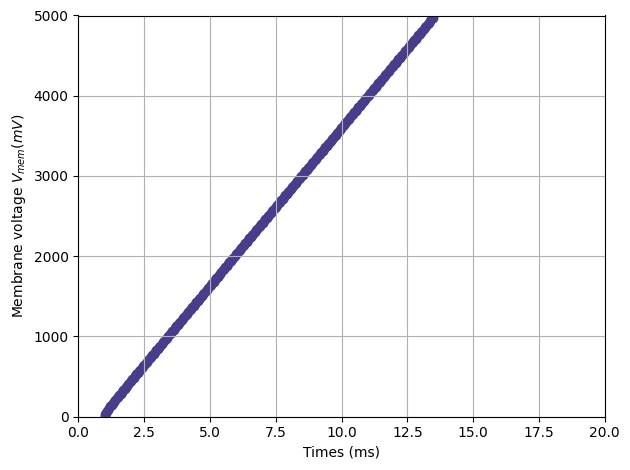

In [8]:
# Raster plot
results.rasterize("V_mem")
fig, ax = plt.subplots(1)
results.raster_plot(ax,'V_mem')
ax.set_ylabel("Axon x-axis (µm)")
ax.set_xlabel("Time (ms)")
ax.set_xlim(0,results.tstop)
ax.set_ylim(0,np.max(results.x_rec))
fig.tight_layout()

## Intracellular stimulation of an myelinated axon

Analogous simulations can be done using this time a myelinated fiber. Similary to unmyelinated fiber, myelinated fiber are defined with (y,z) coordinates, diameter, length, and computationnal model at the creation of an ```myelinated``` object. The default computationnal model uses the ```MRG``` model (McIntyre et al., 2002). Others available models are the ```Gaines_sensory``` and ```Gaines_motor``` models (Gaines et al., 2018). 

It is sometime conveniente to specify a number of Node-of-Ranvier (NoRs) for the simulation instead of a length. Converting the number of NoRs into fiber length can be done with the NRV function ```get_length_from_nodes```.

By default, the membrane potential is only recorded at the NoR of the fiber (```rec = nodes```). The membrane potential can be recorded at all computation points (NoR and myelin) by setting ```rec = all```.

In [9]:
## Axon def
y = 0 # axon y position, in [µm]
z = 0 # axon z position, in [µm]
d = 10 # axon diameter position, in [µm]
n_NoR = 20 #number of Node-of-Ranvier
L = nrv.get_length_from_nodes(d, n_NoR)    
model = "MRG" #myelinated fiber model, MRG by default

axon_m = nrv.myelinated(y, z, d, L, model=model,rec='all')

Attaching an intracelullar clamp is similar, but the position of the clamp on the fiber is defined by a NoR number instead of an absolute $x-position$. Here the clamp is attached to the first NoR of fiber, i.e. the closest NoR to $x = 0\mu m$.

In [10]:
## test pulse
t_start = 1
duration = 0.1
amplitude = 5
clamp_node = 0
axon_m.insert_I_Clamp(clamp_node, t_start, duration, amplitude)

## Simulation
t_sim = 3
results_m = axon_m(t_sim=t_sim)


Results can be plotted the same way we did for the unmyelinated fiber: 

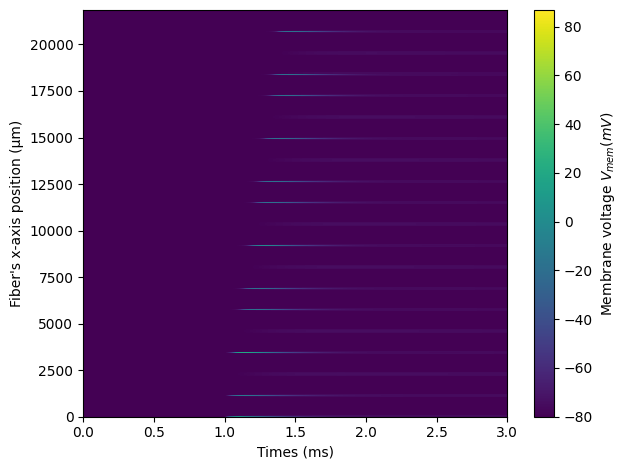

In [11]:
# Color Map
fig, ax = plt.subplots(1)
cbar = results_m.colormap_plot(ax, "V_mem")
ax.set_xlabel('Time (ms)')
ax.set_ylabel('x-position (µm)')
cbar.set_label(r'Membrane Voltage $V_{mem}$ (mV)')
fig.tight_layout()

The AP propagation is also visible but "jumps" from one NoR to the other. This is called the saltatory conduction by opposition to the continuous conduction of the unmyelinated fibers. 

Using the ```rasterize``` function of NRV (figure below) we see that the AP is only detected at the NoR of the fiber.

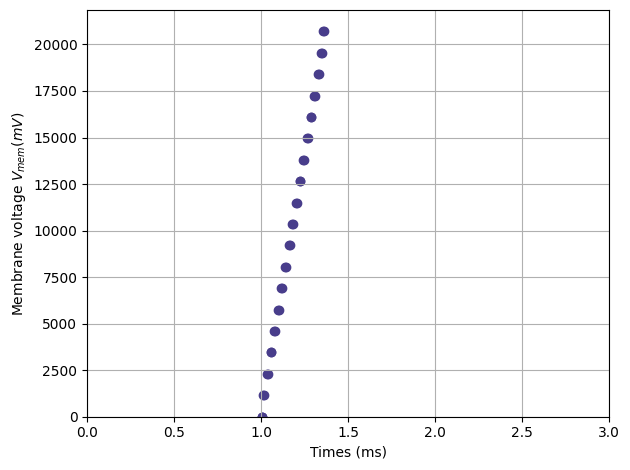

In [12]:
results_m.rasterize("V_mem")
fig, axs = plt.subplots(2)

results_m.plot_x_t(axs[0],'V_mem')
axs[0].set_ylabel("Axon x-axis (µm)")
axs[0].set_xlabel("Time (ms)")
axs[0].set_xlim(0,results_m.tstop)
axs[0].set_ylim(0,np.max(results_m.x_rec))

results_m.raster_plot(axs[1],'V_mem')
axs[1].set_ylabel("Axon x-axis (µm)")
axs[1].set_xlabel("Time (ms)")
axs[1].set_xlim(0,results_m.tstop)
axs[1].set_ylim(0,np.max(results_m.x_rec))

fig.tight_layout()